In [213]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [214]:
benchmark = pd.read_csv('modifiable-benchmark.csv')
benchmark.insert(1, 'Path Present', benchmark['Path Length'] != 0, True)

benchmark.replace({
    'Algorithm': {
        'BreadthFirstSearch': 'BFS',
        'DepthFirstSearch': 'DFS',
        'AStar': 'A*',
        'BidiBestFirstSearch': 'Bidi A*',
    }
}, inplace=True)

benchmark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Algorithm            5000 non-null   object 
 1   Path Present         5000 non-null   bool   
 2   Path Length          5000 non-null   int64  
 3   Path Weight          5000 non-null   float64
 4   Duration (µs)        5000 non-null   float64
 5   Visited Vertices     5000 non-null   int64  
 6   Average Degree       5000 non-null   float64
 7   Average Path Degree  5000 non-null   float64
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 278.4+ KB


In [215]:
benchmark_path = benchmark[benchmark['Path Present']]
benchmark_path.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3185 entries, 2 to 4997
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Algorithm            3185 non-null   object 
 1   Path Present         3185 non-null   bool   
 2   Path Length          3185 non-null   int64  
 3   Path Weight          3185 non-null   float64
 4   Duration (µs)        3185 non-null   float64
 5   Visited Vertices     3185 non-null   int64  
 6   Average Degree       3185 non-null   float64
 7   Average Path Degree  3185 non-null   float64
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 202.2+ KB


In [216]:
benchmark_nopath = benchmark[benchmark['Path Present'] == False]
benchmark_nopath.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1815 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Algorithm            1815 non-null   object 
 1   Path Present         1815 non-null   bool   
 2   Path Length          1815 non-null   int64  
 3   Path Weight          1815 non-null   float64
 4   Duration (µs)        1815 non-null   float64
 5   Visited Vertices     1815 non-null   int64  
 6   Average Degree       1815 non-null   float64
 7   Average Path Degree  1815 non-null   float64
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 115.2+ KB


# Duration of algorithms where a path is present vs not present

<Axes: xlabel='Algorithm', ylabel='Duration (µs)'>

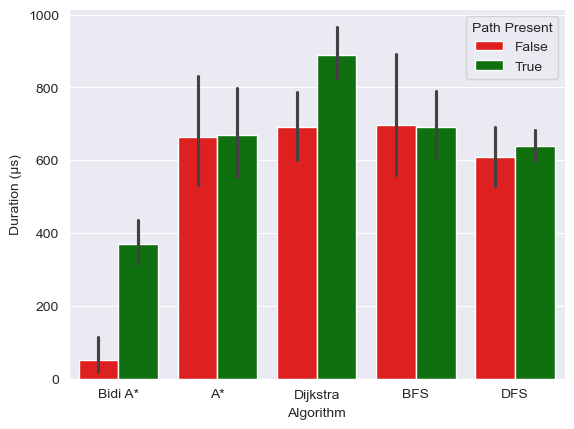

In [217]:
sns.barplot(benchmark, x='Algorithm', y='Duration (µs)', hue='Path Present', hue_order=[False, True],
            palette=['red', 'green'])

# Visit counts of algorithms where a path is present vs not present

<Axes: xlabel='Algorithm', ylabel='Visited Vertices'>

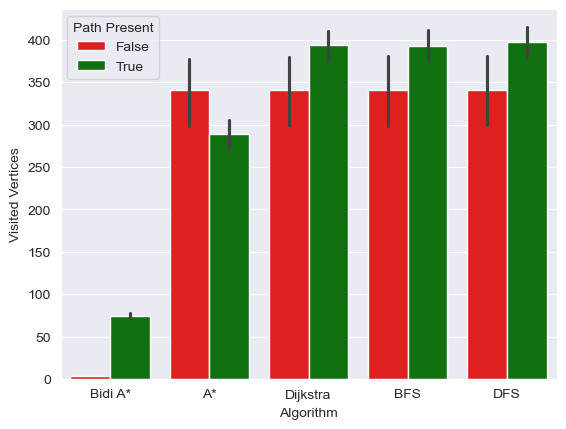

In [218]:
sns.barplot(benchmark, x='Algorithm', y='Visited Vertices', hue='Path Present', hue_order=[False, True],
            palette=['red', 'green'])

# Relationship between algorithm and path length

<Axes: xlabel='Algorithm', ylabel='Path Length'>

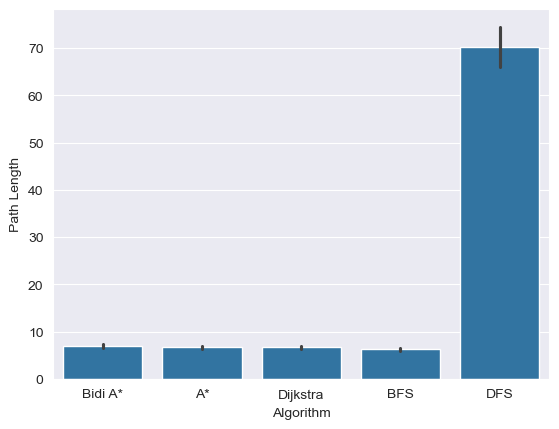

In [219]:
sns.barplot(benchmark, x='Algorithm', y='Path Length')

# Relationship between algorithm and path weight

<Axes: xlabel='Algorithm', ylabel='Path Weight'>

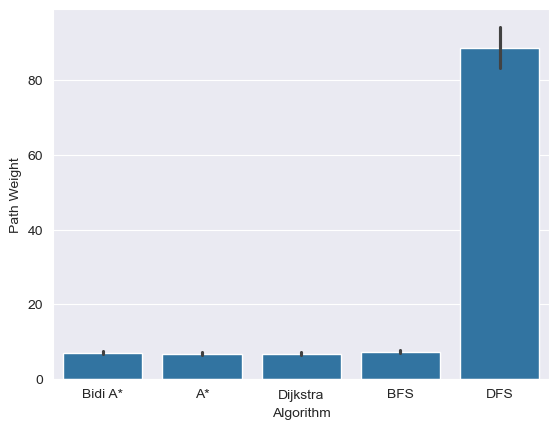

In [220]:
sns.barplot(benchmark, x='Algorithm', y='Path Weight')

# Relationship between visit count and duration

<Axes: xlabel='Visited Vertices', ylabel='Duration (µs)'>

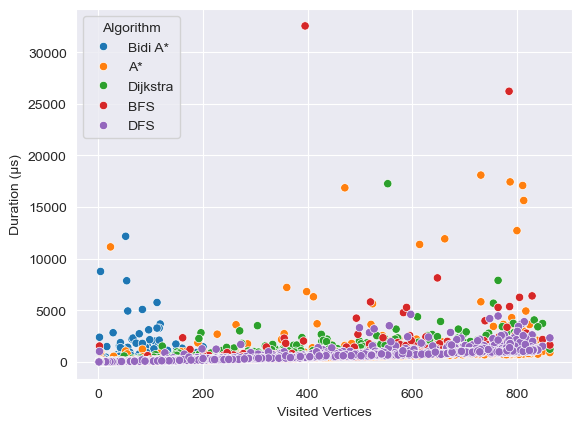

In [221]:
sns.scatterplot(benchmark, x='Visited Vertices', y='Duration (µs)', hue='Algorithm')

<Axes: xlabel='Visited Vertices', ylabel='Duration (µs)'>

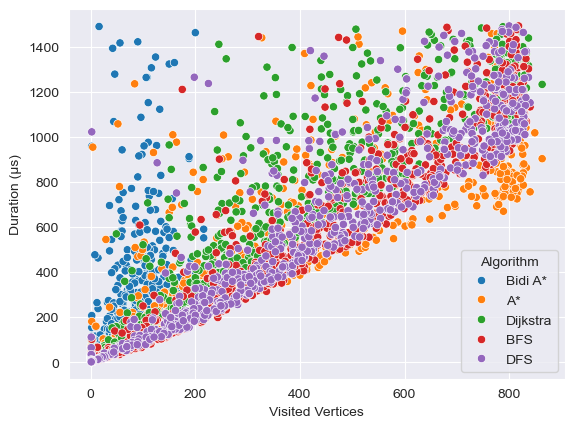

In [222]:
transformed = benchmark[benchmark['Duration (µs)'] < 1500]
sns.scatterplot(transformed, x='Visited Vertices', y='Duration (µs)', hue='Algorithm')

Text(0.5, 0, 'Visited Vertices (Normalized)')

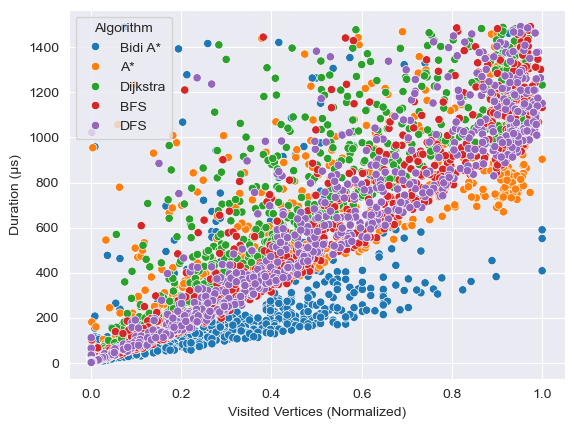

In [223]:
transformed = benchmark[benchmark['Duration (µs)'] < 1500].copy()
transformed['Visited Vertices'] /= transformed.groupby('Algorithm')['Visited Vertices'].transform('max')
sns.scatterplot(transformed, x='Visited Vertices', y='Duration (µs)', hue='Algorithm')
plt.xlabel('Visited Vertices (Normalized)')

# Relationship between path length and visit count

<Axes: xlabel='Path Length', ylabel='Visited Vertices'>

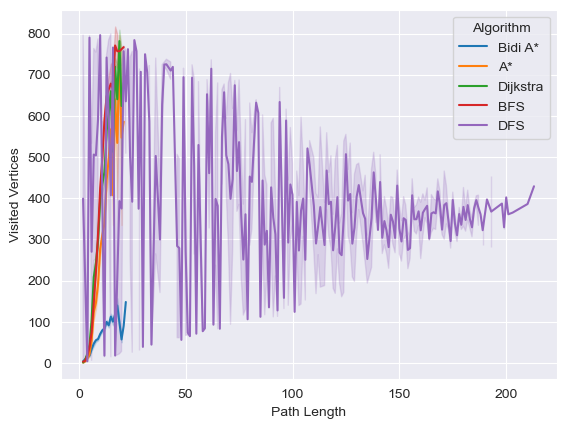

In [224]:
sns.lineplot(benchmark_path, x='Path Length', y='Visited Vertices', hue='Algorithm', errorbar=('ci', 75))

# Relationship between path weight and visit count

<Axes: xlabel='Path Weight', ylabel='Visited Vertices'>

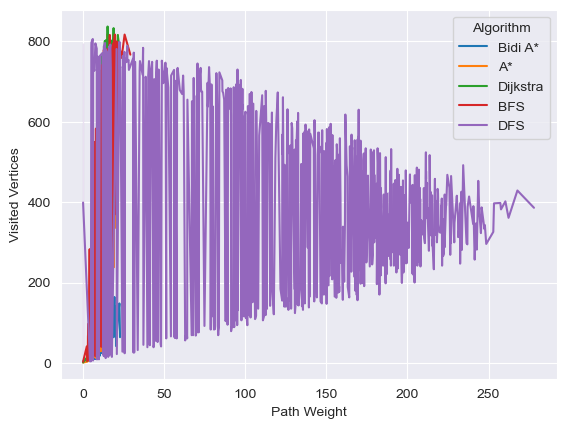

In [225]:
sns.lineplot(benchmark_path, x='Path Weight', y='Visited Vertices', hue='Algorithm')

# Relationship between path length and duration

<Axes: xlabel='Path Length', ylabel='Duration (µs)'>

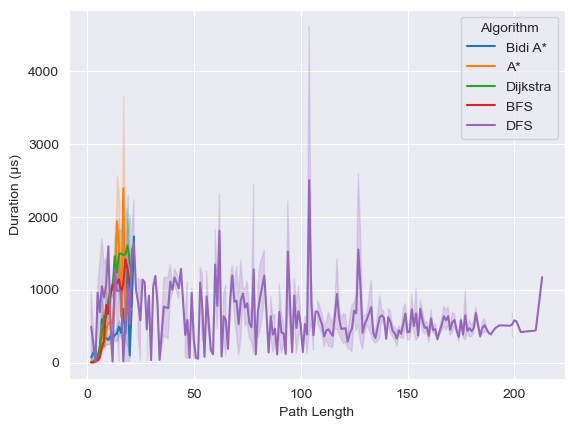

In [226]:
sns.lineplot(benchmark_path, x='Path Length', y='Duration (µs)', hue='Algorithm', errorbar=('ci', 75))

# Relationship between path weight and duration

<Axes: xlabel='Path Weight', ylabel='Duration (µs)'>

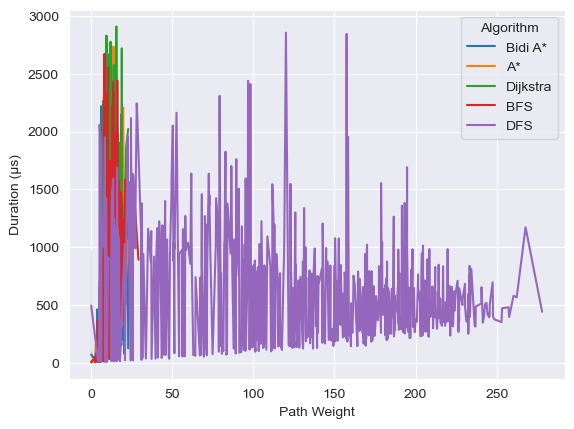

In [227]:
sns.lineplot(benchmark_path[benchmark_path['Duration (µs)'] < 3000], x='Path Weight', y='Duration (µs)',
             hue='Algorithm')

# Relationship between average degree and visit count

<Axes: xlabel='Average Path Degree', ylabel='Visited Vertices'>

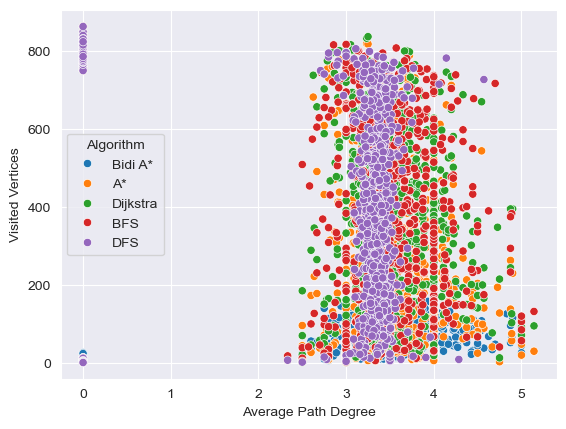

In [228]:
sns.scatterplot(benchmark, x='Average Path Degree', y='Visited Vertices', hue='Algorithm')

# Relationship between average degree and duration

<Axes: xlabel='Average Degree', ylabel='Duration (µs)'>

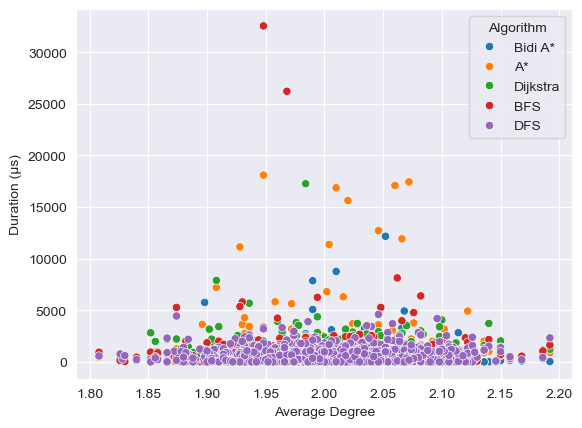

In [229]:
sns.scatterplot(benchmark, x='Average Degree', y='Duration (µs)', hue='Algorithm')

<Axes: xlabel='Average Degree', ylabel='Duration (µs)'>

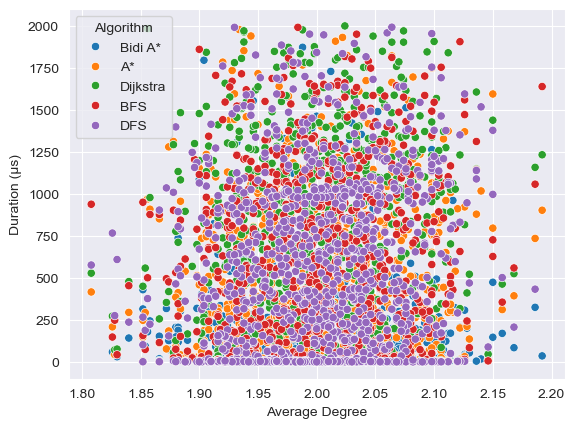

In [230]:
sns.scatterplot(benchmark[benchmark['Duration (µs)'] < 2000], x='Average Degree', y='Duration (µs)', hue='Algorithm')

# Relationship between path length and average degree

<Axes: xlabel='Path Length', ylabel='Average Degree'>

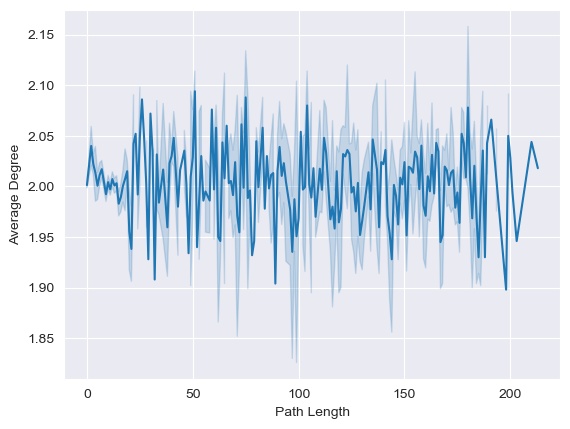

In [231]:
sns.lineplot(benchmark, x='Path Length', y='Average Degree')

# Relationship between path length and average path degree

<Axes: xlabel='Path Length', ylabel='Average Path Degree'>

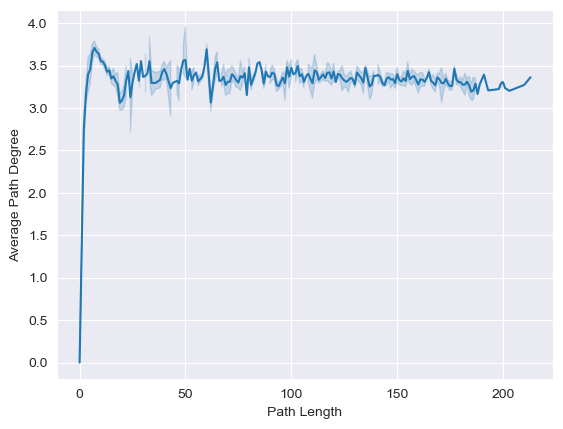

In [232]:
sns.lineplot(benchmark, x='Path Length', y='Average Path Degree')

# Distribution of durations for each algorithm

<Axes: xlabel='Duration (µs)', ylabel='Count'>

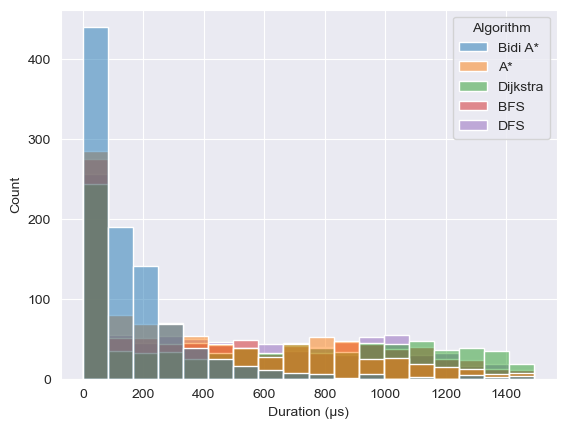

In [233]:
sns.histplot(benchmark[benchmark['Duration (µs)'] < 1500], x='Duration (µs)', hue='Algorithm')

# Distribution of visited vertices for each algorithm

<Axes: xlabel='Visited Vertices', ylabel='Count'>

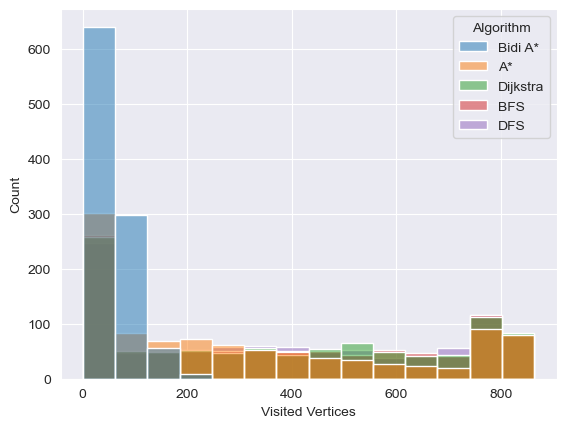

In [234]:
sns.histplot(benchmark, x='Visited Vertices', hue='Algorithm')

# Correlation Heatmap

<Axes: >

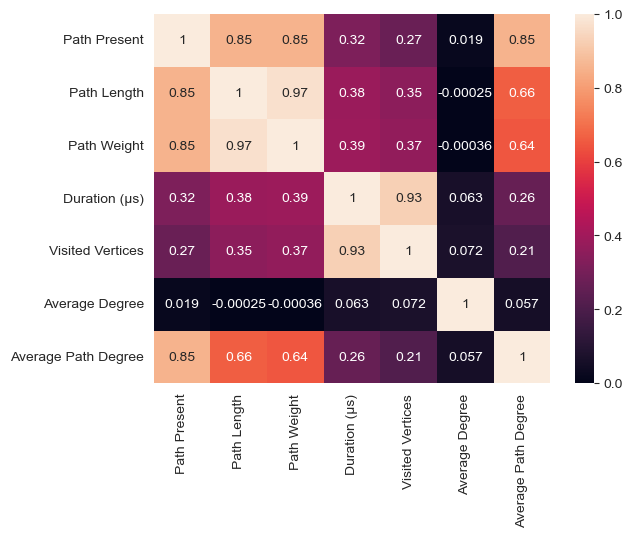

In [235]:
sns.heatmap(benchmark.corr(method='spearman', numeric_only=True), annot=True)